In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from time import process_time
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
random.seed(10)
np.random.seed(10)

In [4]:
features = pd.read_csv('/content/drive/MyDrive/LUFlow/features_selected/LUFlow_RandomForestClassifier_11.csv').squeeze()
features = features[:6]
columns_selected = features.tolist() +  ['label']

In [5]:
luflow_2020 = pd.read_csv('/content/drive/MyDrive/LUFlow/LUFlow2020.csv', usecols=columns_selected)
luflow_2020 = luflow_2020.sample(frac=0.4).reset_index(drop=True)

luflow_2021 = pd.read_csv('/content/drive/MyDrive/LUFlow/LUFlow2021.csv', usecols=columns_selected)
luflow_2021 = luflow_2021.sample(frac=0.4).reset_index(drop=True)

In [6]:
#train data

luflow_2020_X = luflow_2020.drop('label', axis=1).copy()
luflow_2020_y = luflow_2020['label'].copy()

# test data
luflow_2021_X = luflow_2021.drop('label', axis=1).copy()
luflow_2021_y = luflow_2021['label'].copy()

In [7]:
scale = StandardScaler()

luflow_2020_train_X_scaled = scale.fit(luflow_2020_X)
luflow_2020_train_X_scaled = scale.transform(luflow_2020_X)
luflow_2020_test_X_scaled = scale.transform(luflow_2021_X)
luflow_2021_X_scaled = scale.transform(luflow_2021_X)

In [8]:
# define the models with optimal hyperparameter

models = {'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=3.24772861979653e-05),
    'Random Forest': RandomForestClassifier(n_jobs=-1,criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 4, n_estimators= 100),
    'Naive Bayes': GaussianNB(var_smoothing= 1.5199110829529332e-05),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam', alpha=0.001, max_iter=500),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(30,), activation='relu', solver='adam', alpha=0.001, max_iter=500)}

##### Classification report of models on Test data (LUFlow 2021) 

In [10]:
train_models, pred_time, accuracy_test, f_score_test_data = {},{},{},{}

for i, (model, clf) in enumerate(models.items()):

    pred_start_time = process_time()
    clf.fit(luflow_2020_train_X_scaled, luflow_2020_y)
    pred_time[model] = process_time() - pred_start_time
    train_models[model] = clf

    prediction = clf.predict(luflow_2021_X_scaled)
    model_clf_report = metrics.classification_report(luflow_2021_y, prediction, digits=4, output_dict=True)
    accuracy_test[model] = model_clf_report['accuracy']
    f_score_test_data[model] = model_clf_report['weighted avg']['f1-score']

    print(f"{'-'*25} {model} {'-'*25}")
    print(metrics.classification_report(luflow_2021_y, prediction, digits=4))

------------------------- Decision Tree -------------------------
              precision    recall  f1-score   support

      benign     0.9996    0.9985    0.9990    227539
   malicious     0.9985    0.9996    0.9990    227365

    accuracy                         0.9990    454904
   macro avg     0.9990    0.9990    0.9990    454904
weighted avg     0.9990    0.9990    0.9990    454904

------------------------- Random Forest -------------------------
              precision    recall  f1-score   support

      benign     0.9996    0.9981    0.9989    227539
   malicious     0.9981    0.9996    0.9989    227365

    accuracy                         0.9989    454904
   macro avg     0.9989    0.9989    0.9989    454904
weighted avg     0.9989    0.9989    0.9989    454904

------------------------- Naive Bayes -------------------------
              precision    recall  f1-score   support

      benign     0.9511    0.4899    0.6467    227539
   malicious     0.6563    0.9748    0.78

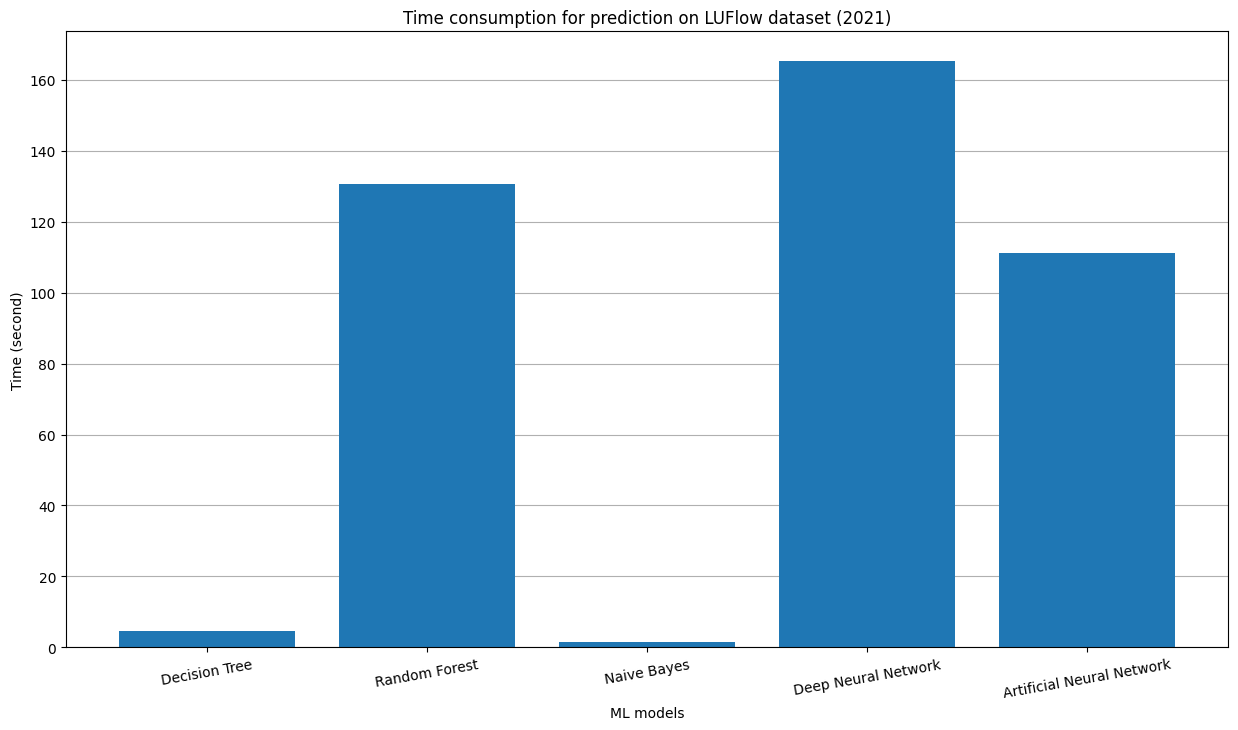

In [11]:
fig, ax = plt.subplots(figsize= (15, 8))
bar = ax.bar(pred_time.keys(), pred_time.values())
ax.set_xlabel("ML models")
ax.set_ylabel("Time (second)")
ax.set_title("Time consumption for prediction on LUFlow dataset (2021)")
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.show()

#### Accuracy comparison plot

<function matplotlib.pyplot.show(close=None, block=None)>

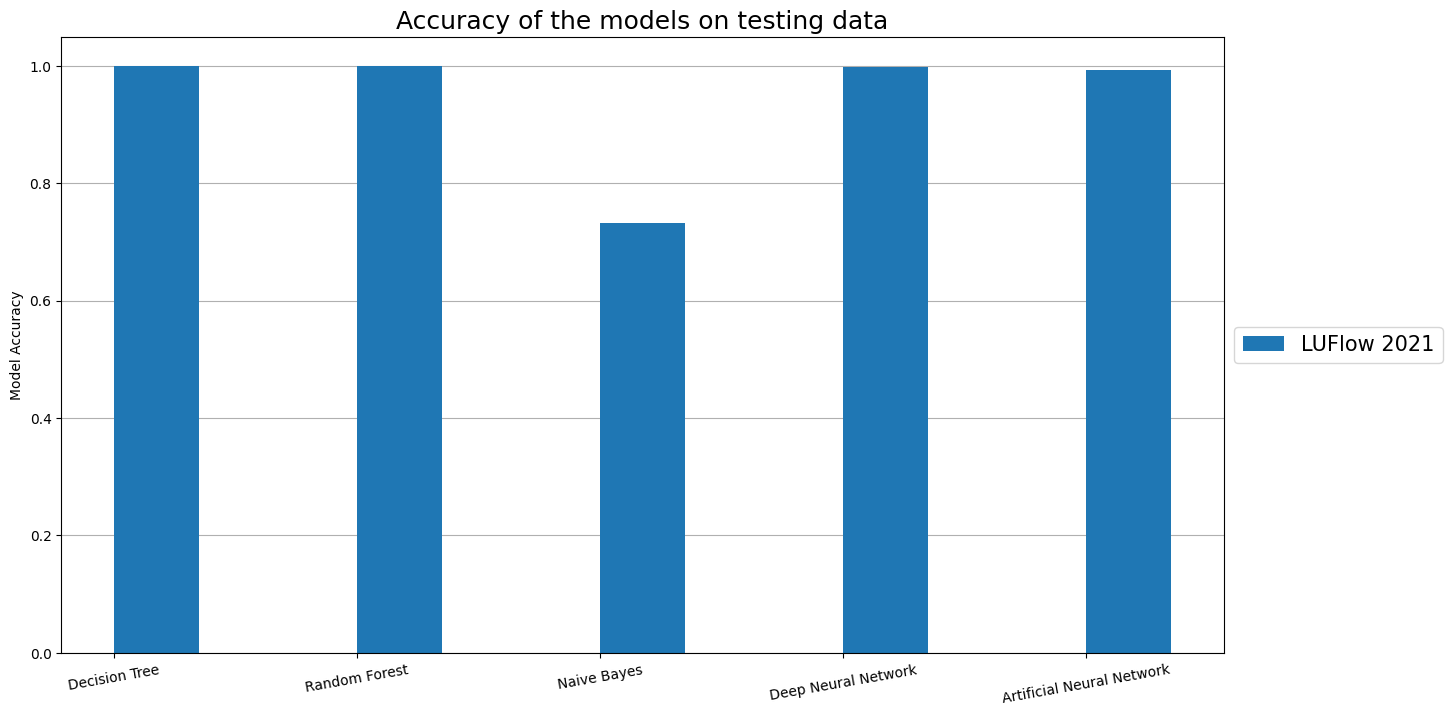

In [12]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(accuracy_test.keys())) 
width = 0.35
bars = ax.bar(x + width/2, accuracy_test.values(), width, label='LUFlow 2021')
ax.set_ylabel('Model Accuracy')
ax.set_title('Accuracy of the models on testing data')
ax.set_xticks(x)
ax.set_xticklabels(accuracy_test.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show